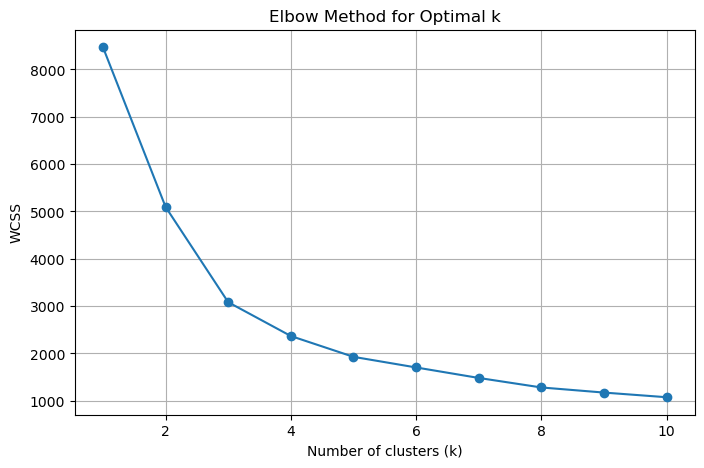

     SALES  QUANTITYORDERED  PRICEEACH  Cluster
0  2871.00               30      95.70        2
1  2765.90               34      81.35        2
2  3884.34               41      94.74        1
3  3746.70               45      83.26        1
4  5205.27               49     100.00        1


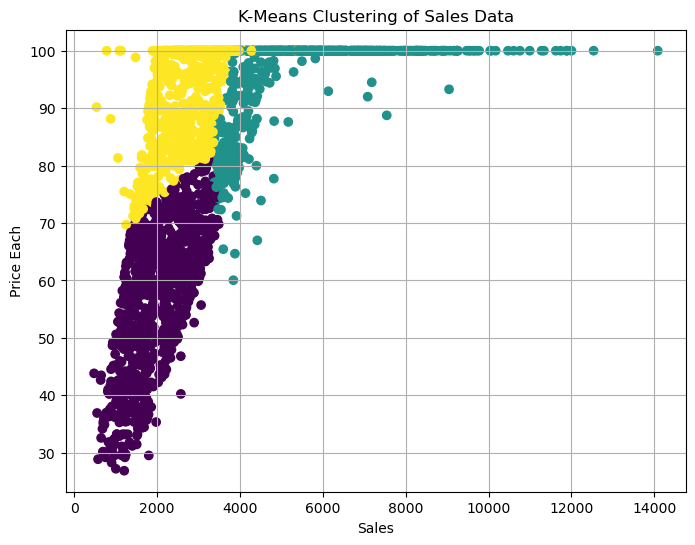

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Step 2: Select numerical columns for clustering
# We'll pick a few meaningful numerical features for clustering
features = ['SALES', 'QUANTITYORDERED', 'PRICEEACH']
df = data[features].dropna()

# Step 3: Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Step 5: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Step 6: Apply K-Means with the chosen number of clusters (say k=3 from the elbow plot)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 7: Add cluster info back to the dataframe
df['Cluster'] = clusters

# Step 8: Display sample results
print(df.head())

# Step 9: Visualize clusters using two features
plt.figure(figsize=(8,6))
plt.scatter(df['SALES'], df['PRICEEACH'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Price Each')
plt.grid()
plt.show()
